# Project Hypothesis Testing:

Gold and Currency: (Gold Reserve and Inflation) - Jiaren

Gold was also used as the world reserve currency up through most of the 20th century. Gold Reserve limits the amount of money a country is allowed to print. The demand for gold increases during inflationary times due to its inherent value and limited supply.  

Hypothesis: There is a relationship between the gold reserve and Inflation.

In [2]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
gold = pd.read_csv('gold.csv')
cpi = pd.read_csv('CPI.csv')
gold = gold.drop(['1960','2015','Series Code','Country Name','Country Code'], axis = 1)
cpi = cpi.drop(['1960','2015','Series Code','Country Name','Country Code'], axis = 1)

In [4]:
with_gold = gold.loc[0]
without_gold = gold.loc[1]
cpi = cpi.loc[0]

In [5]:
m_with_gold = np.matrix(with_gold)
m_without_gold = np.matrix(without_gold)
m_without_gold[0] = m_without_gold[0].astype(np.float)
m_with_gold[0] = m_with_gold[0].astype(np.float)

In [6]:
gold = np.subtract(m_with_gold,m_without_gold )
gold = gold[0].tolist()
gold = gold[0]

In [7]:
result = pd.DataFrame()
result['Inflation'] = cpi
result['gold'] = gold

In [8]:
goldDF = pd.DataFrame()
inflation = pd.DataFrame()
goldDF['gold'] = gold
inflation['Inflation'] = cpi

In [9]:
from sklearn.preprocessing import normalize

In [10]:
n = result['Inflation'].size
result['Normalized Gold Reserve'] = (result['gold'] - result['gold'].mean())/(result['gold'].std()/np.sqrt(n))
result['Normalized Inflation'] = (result['Inflation'] - result['Inflation'].mean())/(result['Inflation'].std()/np.sqrt(n))

In [11]:
result['Normalized Gold Reserve'].corr(result['Normalized Inflation'])

-0.17656958403321321

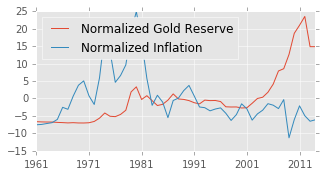

In [12]:
result.plot(y = ['Normalized Gold Reserve','Normalized Inflation'],figsize=(5, 2.5))

A weak downhill (negative) linear relationship

In [14]:
import statsmodels.formula.api as smf
Y = result['Normalized Gold Reserve']
X = result['Normalized Inflation']
results = smf.OLS(Y, X).fit()
results.rsquared

0.031176818005661966

In [15]:
results.pvalues

Normalized Inflation    0.197204
dtype: float64

# P value is 0.197 (greater than 0.05)
A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.